<a href="https://colab.research.google.com/github/mushfiqulIslam/mltraining/blob/master/house-prices/house-price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
train_url = 'https://raw.githubusercontent.com/mushfiqulIslam/mltraining/master/house-prices/datasets/train.csv'
test_url = 'https://raw.githubusercontent.com/mushfiqulIslam/mltraining/master/house-prices/datasets/test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [112]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [113]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
#statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

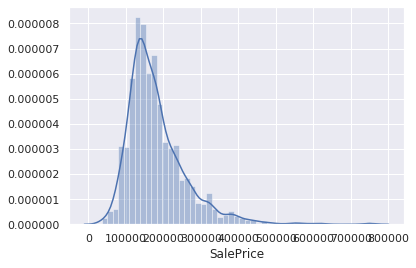

In [115]:
#histogram
sns.distplot(train['SalePrice']); #;can be or can not be inclided

In [116]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


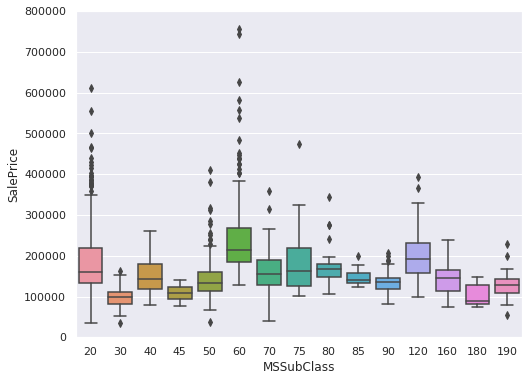

In [117]:
#box plot MSSubClass/saleprice
var = 'MSSubClass'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

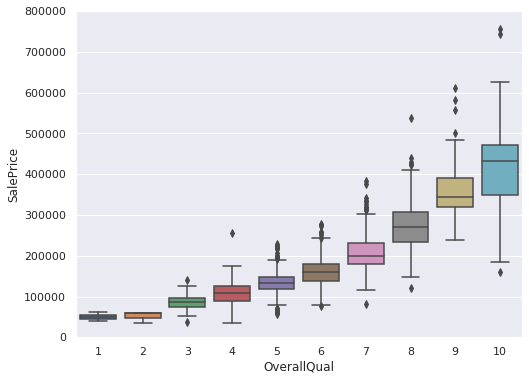

In [118]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


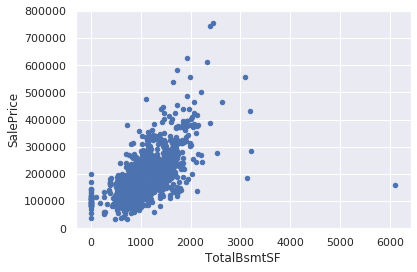

In [119]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


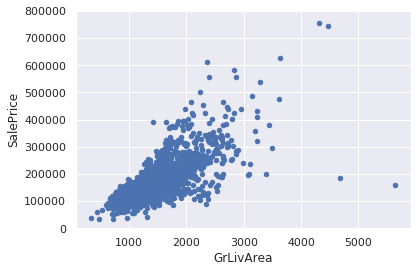

In [120]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

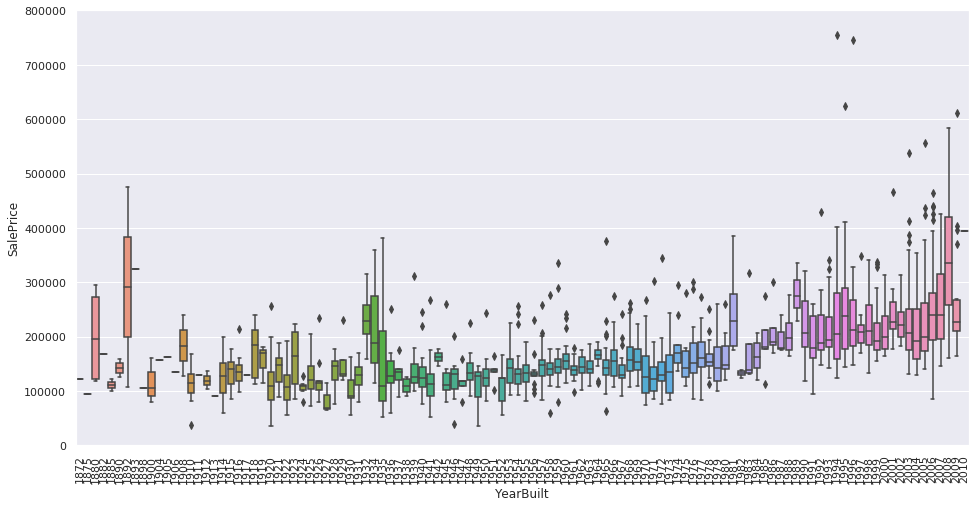

In [121]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

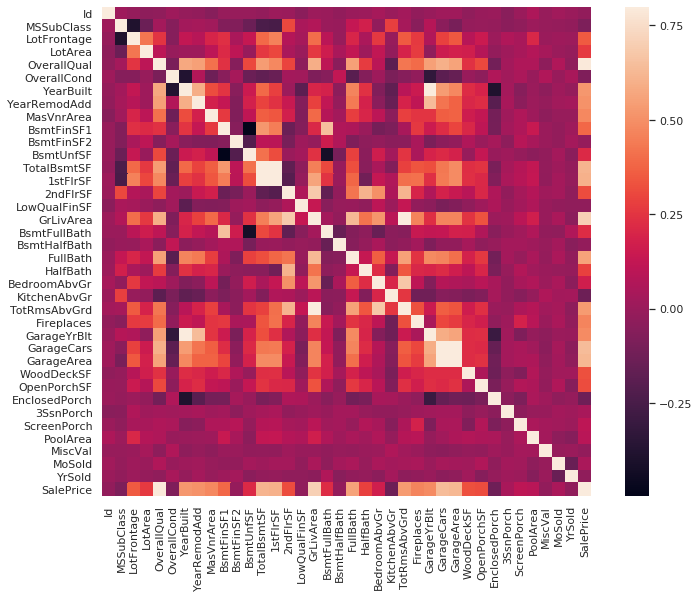

In [122]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

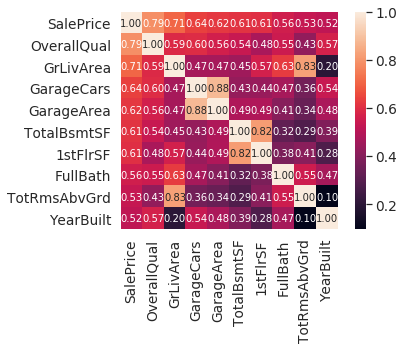

In [123]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

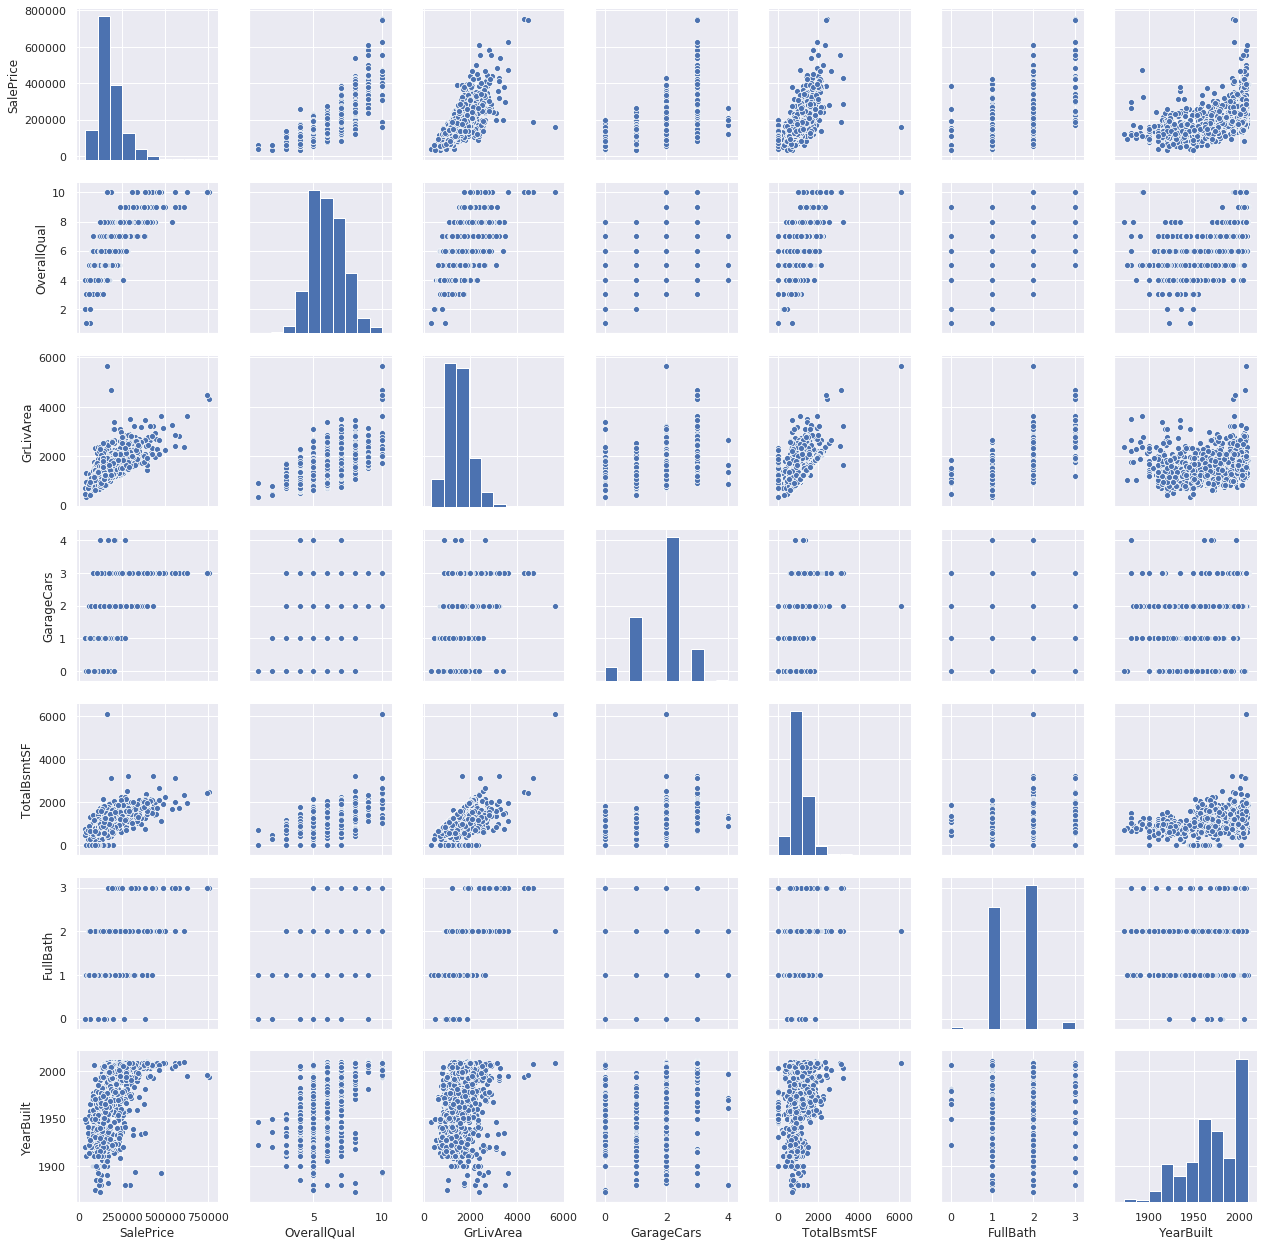

In [124]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [125]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
#dealing with missing data
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [127]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


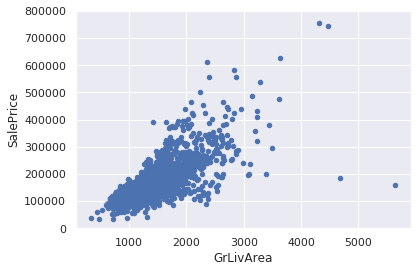

In [128]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [0]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


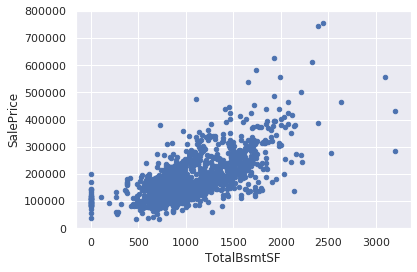

In [130]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

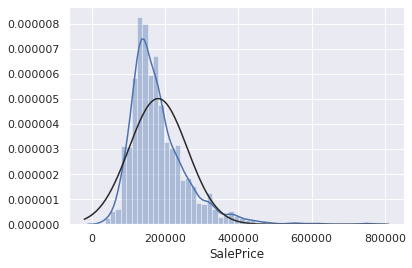

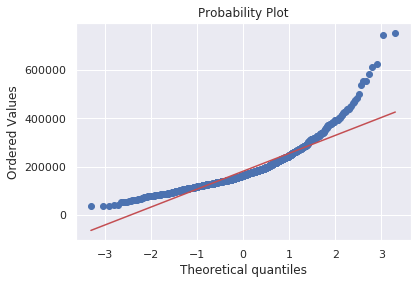

In [131]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [0]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

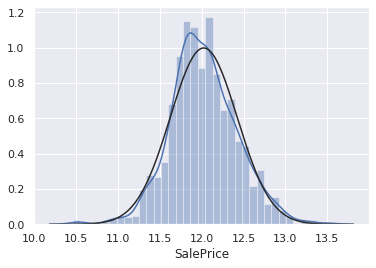

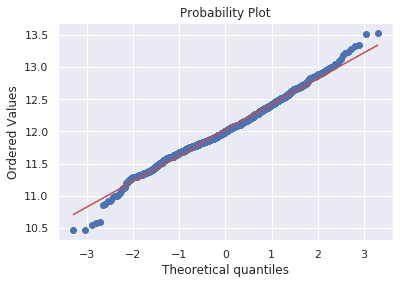

In [133]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

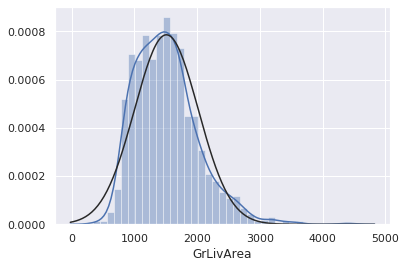

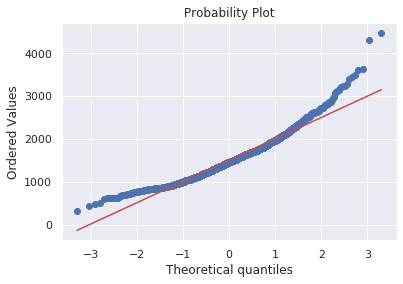

In [134]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [0]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

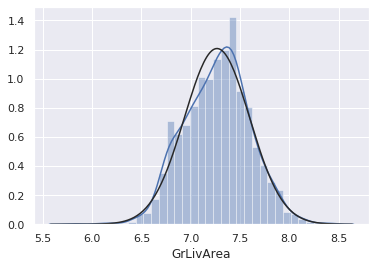

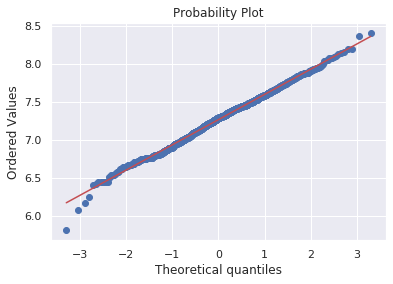

In [136]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

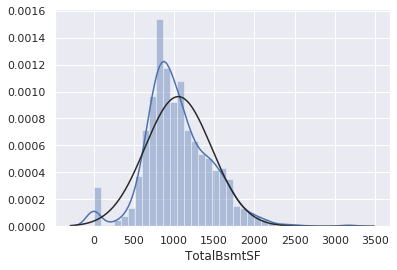

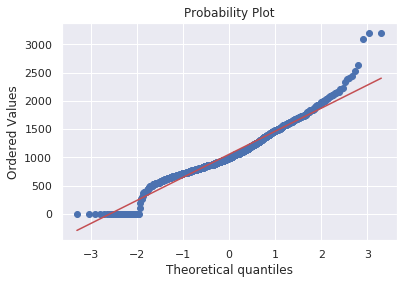

In [137]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

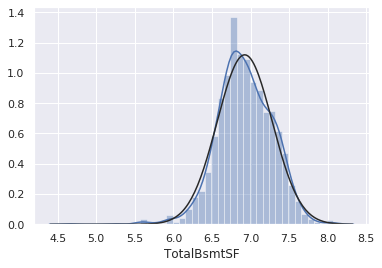

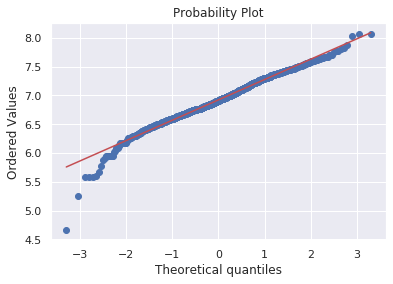

In [140]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

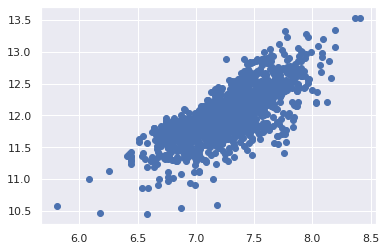

In [141]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);

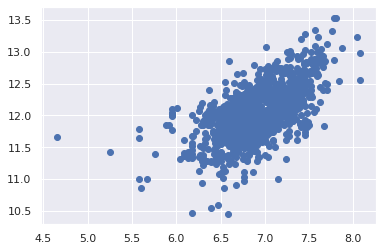

In [142]:
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [143]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [144]:
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageCond', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'BsmtUnfSF', 'SaleType', 'Exterior1st', 'KitchenQual', 'GarageArea']
train = train.drop(columns, axis=1)
test = test.drop(columns, axis=1)
train.isnull().sum().max() #just checking that there's no missing data missing.

0

In [145]:
test.isnull().sum().max() #just checking that there's no missing data missing.

1

In [146]:
train = train.drop('HasBsmt', axis=1)
print(len(train.columns), len(test.columns))

50 49


In [147]:
null_columns = test.columns[test.isnull().any()]
print(test[test["GarageCars"].isnull()][null_columns])

      TotalBsmtSF  GarageCars
1116        859.0         NaN


In [148]:
null_columns = test.columns[test.isnull().any()]
test[test["TotalBsmtSF"].isnull()][null_columns]
#test["TotalBsmtSF"][660]

,TotalBsmtSF,GarageCars
660,NaN,1.0


In [149]:
test["TotalBsmtSF"][660] = 0
test["GarageCars"][1116] = 0
test.isnull().sum().max()

0

In [150]:

train = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']]
train.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,7.444249,2,6.752270,2,2003,12.247694
1,6,7.140453,2,7.140453,2,1976,12.109011
2,7,7.487734,2,6.824374,2,2001,12.317167
3,7,7.448334,3,6.628041,1,1915,11.849398
4,8,7.695303,3,7.043160,2,2000,12.429216
5,5,7.216709,2,6.679599,1,1993,11.870600
6,8,7.434848,2,7.430114,2,2004,12.634603
7,7,7.644919,2,7.009409,2,1973,12.206073
8,7,7.480992,2,6.858565,2,1931,11.774520
9,5,6.981935,1,6.898715,1,1939,11.678440


In [151]:
test = test[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
test.head(10)

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,1461,5,896,1.0,882.0,1,1961
1,1462,6,1329,1.0,1329.0,1,1958
2,1463,5,1629,2.0,928.0,2,1997
3,1464,6,1604,2.0,926.0,2,1998
4,1465,8,1280,2.0,1280.0,2,1992
5,1466,6,1655,2.0,763.0,2,1993
6,1467,6,1187,2.0,1168.0,2,1992
7,1468,6,1465,2.0,789.0,2,1998
8,1469,7,1341,2.0,1300.0,1,1990
9,1470,4,882,2.0,882.0,1,1970


In [152]:
#data transformation
test['GrLivArea'] = np.log(test['GrLivArea'])
test['TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
test.head(10)

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,1461,5,6.797940,1.0,6.782192,1,1961
1,1462,6,7.192182,1.0,7.192182,1,1958
2,1463,5,7.395722,2.0,6.833032,2,1997
3,1464,6,7.380256,2.0,6.830874,2,1998
4,1465,8,7.154615,2.0,7.154615,2,1992
5,1466,6,7.411556,2.0,6.637258,2,1993
6,1467,6,7.079184,2.0,7.063048,2,1992
7,1468,6,7.289611,2.0,6.670766,2,1998
8,1469,7,7.201171,2.0,7.170120,1,1990
9,1470,4,6.782192,2.0,6.782192,1,1970


In [153]:
print(train['YearBuilt'].min(), train['YearBuilt'].max())

1872 2010


In [154]:
criteria = [train['YearBuilt'].between(1872, 1900), train['YearBuilt'].between(1901, 1928), train['YearBuilt'].between(1929, 1956), train['YearBuilt'].between(1957, 1984), train['YearBuilt'].between(1985, 2012)]
values = [1, 2, 3, 4, 5]

train['YearBuilt'] = np.select(criteria, values, 0)
train['YearBuilt'].head()

0    5
1    4
2    5
3    2
4    5
Name: YearBuilt, dtype: int64

In [155]:
criteria = [test['YearBuilt'].between(1872, 1900), test['YearBuilt'].between(1901, 1928), test['YearBuilt'].between(1929, 1956), test['YearBuilt'].between(1957, 1984), test['YearBuilt'].between(1985, 2012)]
values = [1, 2, 3, 4, 5]
test['YearBuilt'] = np.select(criteria, values, 0)
test['YearBuilt'].head()

0    4
1    4
2    5
3    5
4    5
Name: YearBuilt, dtype: int64

In [156]:
np.any(np.isinf(test))

True

In [157]:
ar_inf = np.where(np.isinf(test))
print (ar_inf)

(array([ 125,  133,  269,  318,  354,  387,  388,  396,  397,  398,  400,
        455,  590,  606,  608,  660,  662,  728,  729,  730,  733,  756,
        764,  927,  975,  992,  993, 1030, 1038, 1087, 1092, 1104, 1118,
       1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [159]:
test[np.isinf(test)] = 0
np.any(np.isinf(test))

False

In [160]:
test_data = test.drop("Id", axis=1).copy()
test_data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,5,6.797940,1.0,6.782192,1,4
1,6,7.192182,1.0,7.192182,1,4
2,5,7.395722,2.0,6.833032,2,5
3,6,7.380256,2.0,6.830874,2,5
4,8,7.154615,2.0,7.154615,2,5
...,...,...,...,...,...,...
1454,4,6.995766,0.0,6.302619,1,4
1455,4,6.995766,1.0,6.302619,1,4
1456,5,7.109879,2.0,7.109879,1,4
1457,5,6.877296,0.0,6.815640,1,5


In [161]:
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y = train['SalePrice']
X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,2,6.752270,2,5
1,6,7.140453,2,7.140453,2,4
2,7,7.487734,2,6.824374,2,5
3,7,7.448334,3,6.628041,1,2
4,8,7.695303,3,7.043160,2,5
...,...,...,...,...,...,...
1455,6,7.406711,2,6.859615,2,5
1456,6,7.636752,2,7.340836,2,4
1457,7,7.757906,1,7.049255,2,3
1458,5,6.982863,1,6.982863,1,3


In [162]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

In [0]:
las_cv = LassoCV(cv=5, random_state=0)
las_cv.fit(X, y)
las_cv.score(X, y)
las_cv_pred = las_cv.predict(test_data)

In [0]:
ridge_cv = RidgeCV(alphas=(0.8, 0.5, 0.3, 0.6, 0.1, 0.8))
ridge_cv.fit(X, y)
ridge_cv.score(X, y)
ridge_cv_pred = ridge_cv.predict(test_data)

In [0]:
elastic_cv = ElasticNetCV(cv=5, random_state=0)
elastic_cv.fit(X, y)
elastic_cv.score(X, y)
elastic_cv_pred = elastic_cv.predict(test_data)

In [0]:
prediction =  0.30 * las_cv_pred + 0.36 * ridge_cv_pred + 0.34 * elastic_cv_pred

In [174]:
prediction = np.exp(prediction)
prediction

array([113410.74601151, 152581.8577073 , 172376.88781678, ...,
       143963.34355336, 115496.11410615, 255908.81519037])

In [175]:
#prediction =  0.30 * np.exp(las_cv_pred) + 0.36 * np.exp(ridge_cv_pred) + 0.34 * np.exp(elastic_cv_pred)
#prediction

array([113410.90550191, 152582.73929956, 172377.0994092 , ...,
       143964.17829135, 115496.19853832, 255909.91830989])

In [0]:
submission = pd.DataFrame({
    "Id" : test["Id"],
    "SalePrice"    : prediction
})

submission.to_csv('submission.csv', index=False)

In [177]:
submission = pd.read_csv('submission.csv')
submission.head()

,Id,SalePrice
0,1461,113410.905502
1,1462,152582.739300
2,1463,172377.099409
3,1464,190435.312071
4,1465,215580.101895
